In [314]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

current_dir = os.getcwd()

In [315]:
df = pd.read_csv(os.path.join(current_dir, '..', 'SharedData', 'Climate_Data_with_FIPS.csv'), dtype={'FIPS': str})

In [316]:
counties = gpd.read_file(os.path.join(current_dir, '..', 'SharedData', 'Counties2', 'us_county.shp')).rename(columns={"GEOID": "FIPS"})

counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,FIPS,NAME,LSAD,ALAND,AWATER,id,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,6.393875e+08,69473325.0,1,"POLYGON ((959182.740 -821711.187, 959268.612 -..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,7.504394e+08,4829777.0,2,"POLYGON ((1350485.716 -619831.406, 1350606.534..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1.103572e+09,13943044.0,3,"POLYGON ((1155226.654 -790469.014, 1155326.223..."
3,21,065,00516879,0500000US21065,21065,Estill,06,6.555099e+08,6516335.0,4,"POLYGON ((1390075.380 -684612.798, 1390215.039..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,9.027272e+08,7182793.0,5,"POLYGON ((1386431.679 -594472.514, 1386496.220..."


In [317]:
counties["FIPS"] = counties["FIPS"].astype(int)
df["FIPS"] = df["FIPS"].astype(int)

In [318]:
def plot_data_map(year, column):
    # Filter for the specific year
    df_year = df[df['Year'] == year]
    
    # Merge the filtered DataFrame with the counties GeoDataFrame
    merged = counties.merge(df_year, how="outer", on="FIPS")
    
    # Plot the data
    column_to_plot = column
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    vmin = df[column].min()
    vmax = df[column].max()
    merged.plot(column=column_to_plot, cmap='viridis', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)
    ax.axis('off')  
    plt.title(f'US County Average Temperature in {year}')
    plt.show()

In [319]:
# Generalized function for plotting features against each other
def plot_dependent_vs_independent(df, column_independent, column_dependent, regression=False):
    # Drop rows with NaN values in the specified columns
    df_cleaned = df.dropna(subset=[column_independent, column_dependent])
    
    # Extract the specified columns from the cleaned DataFrame
    x_values = df_cleaned[column_independent]
    y_values = df_cleaned[column_dependent]
    
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o')
    plt.xlabel(column_independent)
    plt.ylabel(column_dependent)
    plt.title(f'{column_dependent} vs. {column_independent}')
    
    # Add regression line if desired
    if regression:
        X = x_values.values.reshape(-1, 1)
        y = y_values.values
        model = LinearRegression()
        model.fit(X, y)
        plt.plot(X, model.predict(X), color='red')
        
        slope = model.coef_[0]
        intercept = model.intercept_
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
    
    plt.grid(True)
    plt.show()

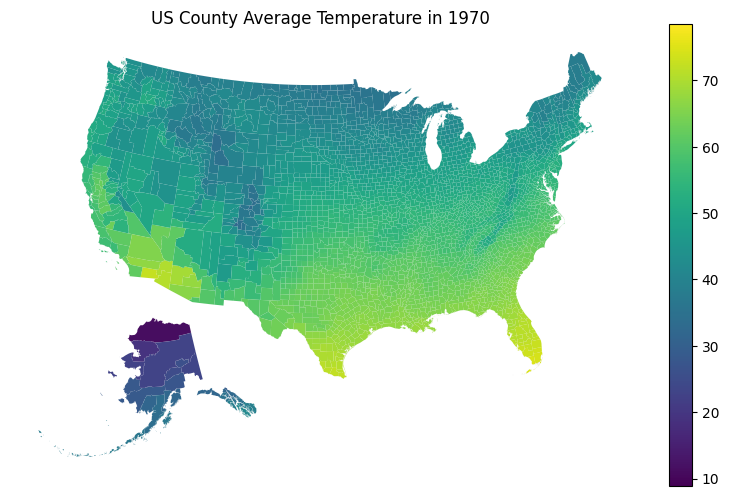

In [320]:
plot_data_map(1970, 'Avg_Temp')

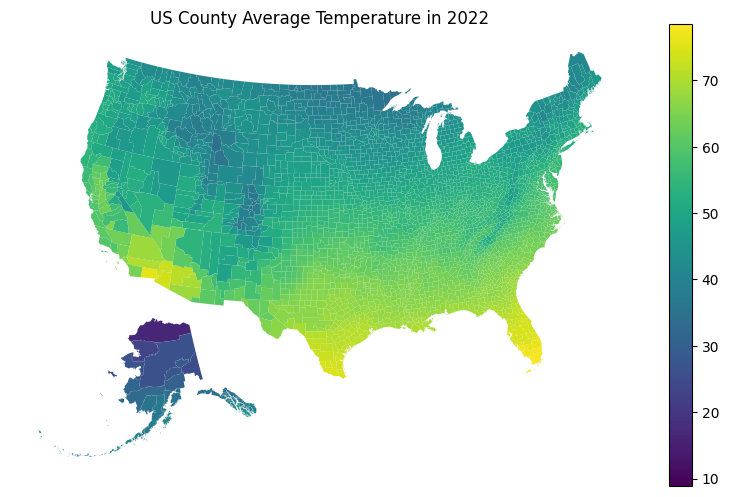

In [321]:
plot_data_map(2022, 'Avg_Temp')

Slope: 0.04583524375254172
Intercept: -37.223722806730656


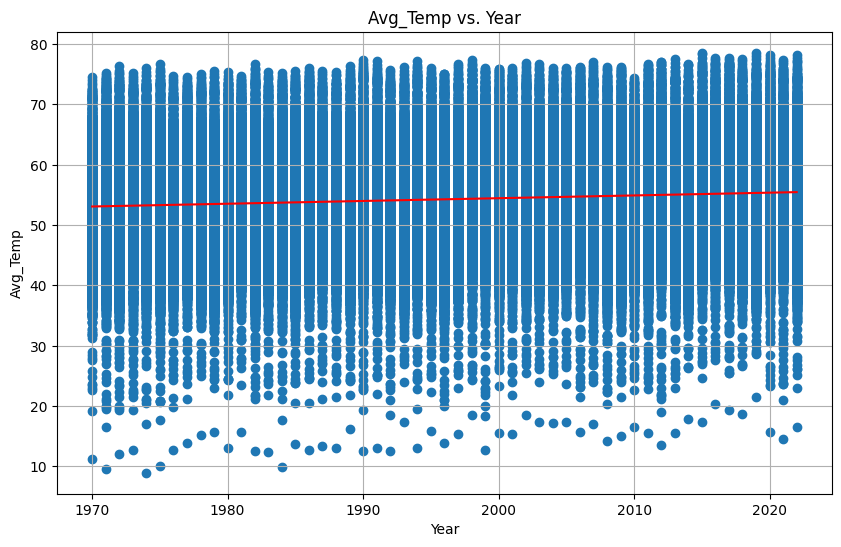

In [322]:
# Does not look great
plot_dependent_vs_independent(df, 'Year', 'Avg_Temp', True)

Slope: 1.0457406932115114
Intercept: -37.241034254481924


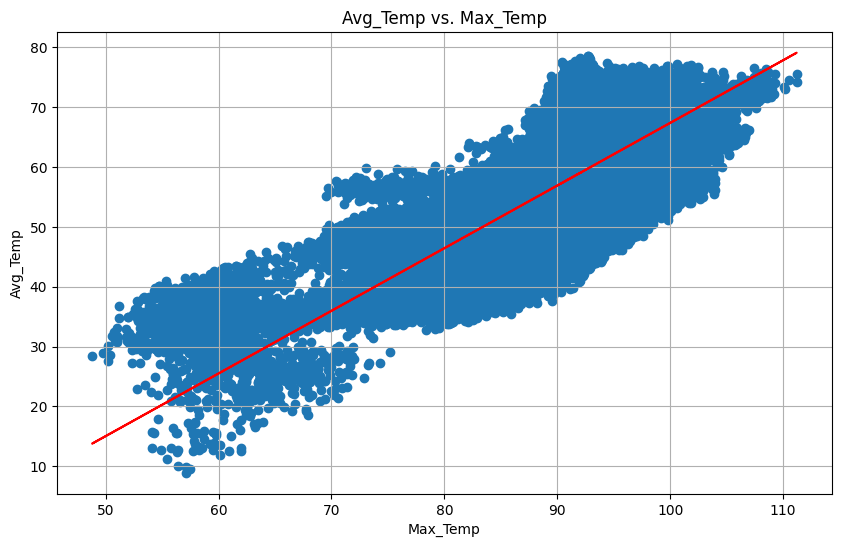

In [323]:
plot_dependent_vs_independent(df, 'Max_Temp', 'Avg_Temp', True)

Slope: 0.6209383495285193
Intercept: 41.82014875051977


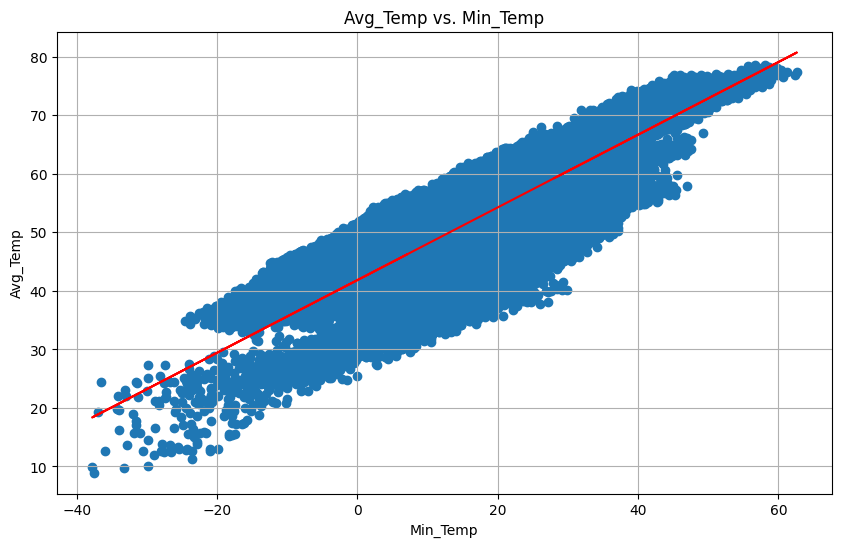

In [324]:
plot_dependent_vs_independent(df, 'Min_Temp', 'Avg_Temp', True)

Slope: 0.15395517115975219
Intercept: 48.170423463190346


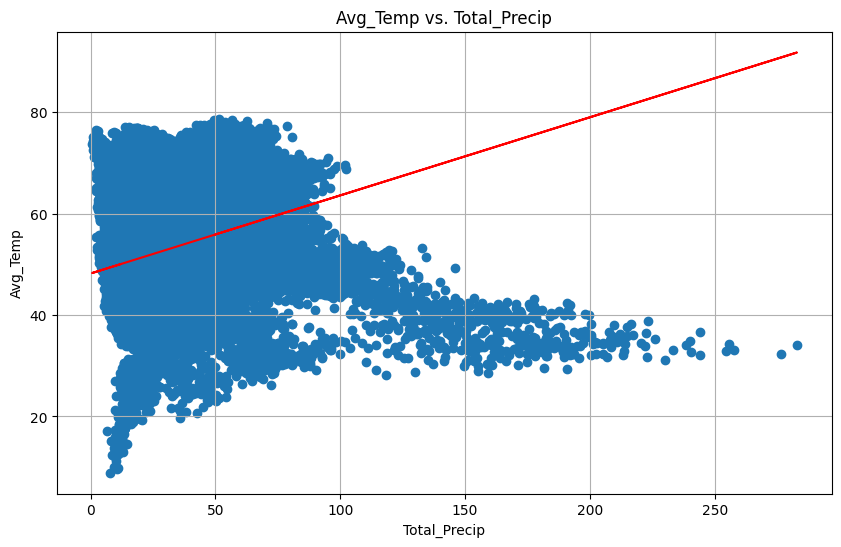

In [325]:
plot_dependent_vs_independent(df, 'Total_Precip', 'Avg_Temp', True)

Slope: 1.1071123072276878
Intercept: -76.83513095638885


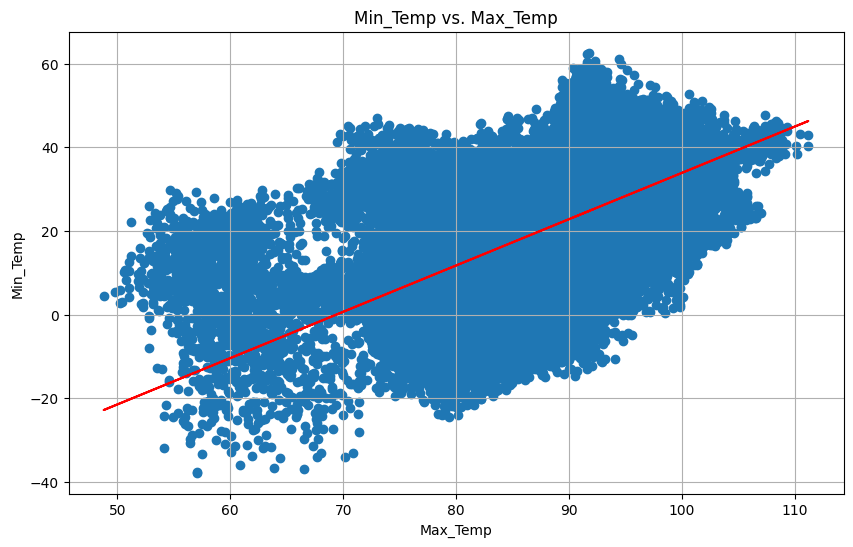

In [326]:
plot_dependent_vs_independent(df, 'Max_Temp', 'Min_Temp', True)